<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Julho_2020_using/blob/master/Segmentacao_e_salva_TODAS_calcula_entrada_FotoS_v02_julho_02_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


Cloning into 'Doutorado'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 259 (delta 2), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (259/259), 109.31 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (119/119), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_fev_2020/Doutorado


In [ ]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)


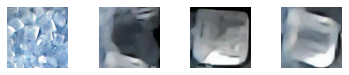

In [ ]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [ ]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

# Rescale the images in the 'images' array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [ ]:
# Import 'rgb2gray' from 'skimage.color'
from skimage.color import rgb2gray

# Convert 'images28' to an array
images28 = np.array(images28)

# Convert 'images28' to grayscale
images28 = rgb2gray(images28)

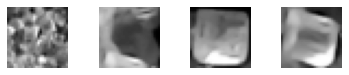

In [ ]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [ ]:
# Segmentation: start here......

In [ ]:
# start top

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [ ]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [ ]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
print(img.shape)

(1200, 1200)


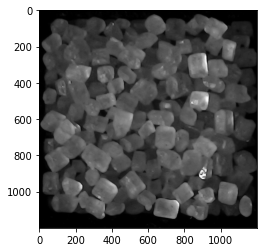

In [ ]:
plt.imshow(img, cmap = "gray")

In [ ]:
#First top

In [ ]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]
SizeWidth=[]  

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
      
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [ ]:
#2nd top

In [ ]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [ ]:
#3th top

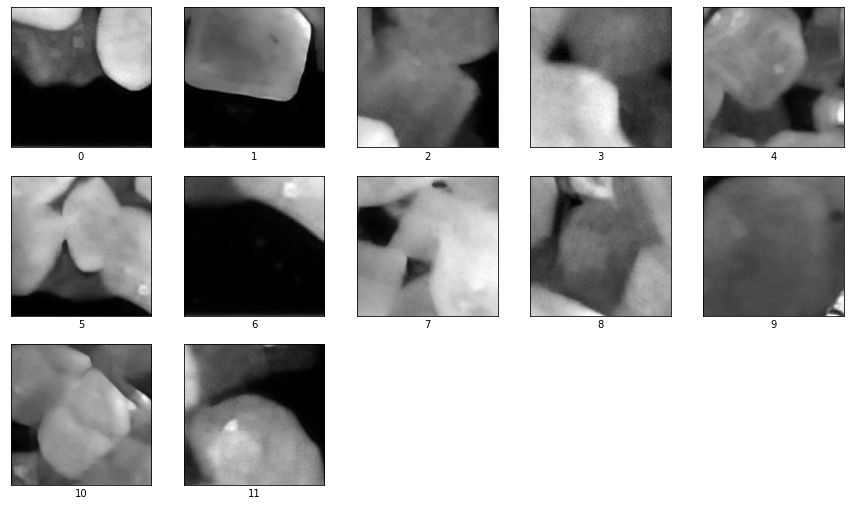

In [ ]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [ ]:
#4th top

In [ ]:
Types_top=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_top.append(Valor)

i= 0 =====
Tipo=B
i= 1 =====
Tipo=B
i= 2 =====
Tipo=I
i= 3 =====
Tipo=I
i= 4 =====
Tipo=I
i= 5 =====
Tipo=I
i= 6 =====
Tipo=B
i= 7 =====
Tipo=I
i= 8 =====
Tipo=I
i= 9 =====
Tipo=I
i= 10 =====
Tipo=G
i= 11 =====
Tipo=I


<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 5th top

In [ ]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [ ]:
# 6th top

In [ ]:
img28_top=pd.DataFrame(img28_ravel_all)
img28_top.insert(0,"Type",Types_top)
img28_top.insert(0, "Width", SizeWidth) 

In [ ]:
# Start middle

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
#First middle

In [ ]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]
SizeWidth=[]  
for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [ ]:
print([i+y,j+x])
print([x,y])
print([Size,Width])

[260, 958]
[800, 102]
[1200, 159]


In [ ]:
print(np.array(img).shape)

(1200, 1200)


In [ ]:
#2nd middle

In [ ]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [ ]:
#3th middle

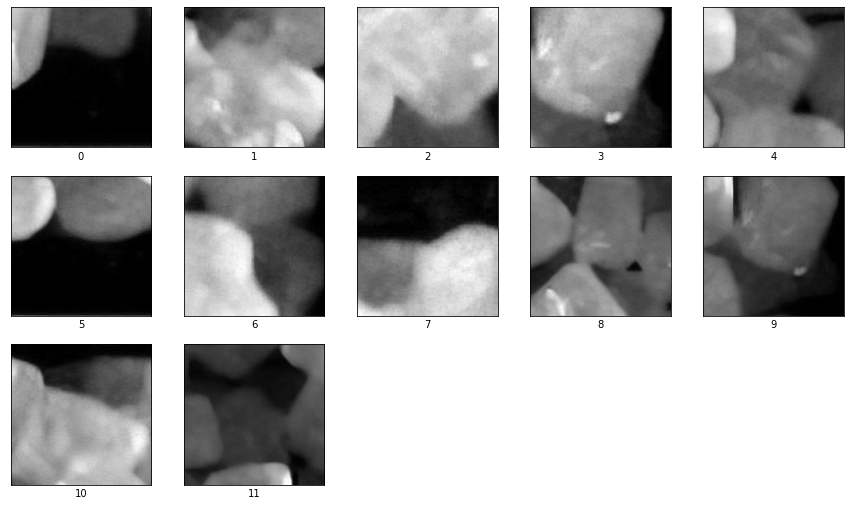

In [ ]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [ ]:
#4th middle

In [ ]:
Types_middle=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_middle.append(Valor)

i= 0 =====
Tipo=I
i= 1 =====
Tipo=I
i= 2 =====
Tipo=I
i= 3 =====
Tipo=I
i= 4 =====
Tipo=I
i= 5 =====
Tipo=I
i= 6 =====
Tipo=
i= 7 =====
Tipo=I
i= 8 =====
Tipo=I
i= 9 =====
Tipo=I
i= 10 =====
Tipo=I
i= 11 =====
Tipo=I


<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 5th middle

In [ ]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [ ]:
# 6th middle

In [ ]:
img28_middle=pd.DataFrame(img28_ravel_all)
img28_middle.insert(0,"Type",Types_middle)
img28_middle.insert(0, "Width", SizeWidth) 

In [ ]:
# start bottom

In [ ]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [ ]:
# First bottom

In [ ]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]
SizeWidth=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  SizeWidth.append(Width)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


In [ ]:
# 2nd bottom

In [ ]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [ ]:
# 3th bottom

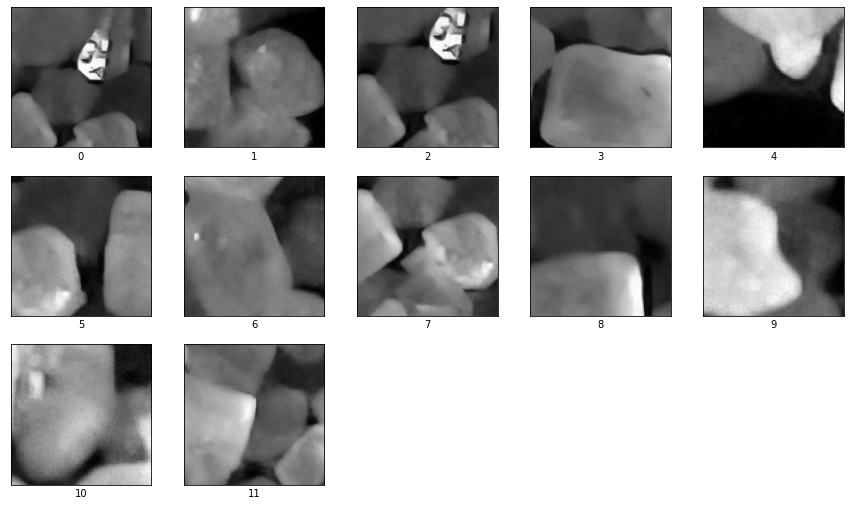

In [ ]:

plt.figure(figsize=(15,15))
for i in range(Num):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(ww[i], cmap = "gray")
  plt.xlabel(i)

  

In [ ]:
# 4th bottom

In [ ]:
Types_bottom=[]
plt.figure(figsize=(15,15))
for i in range(Num):
  print('i=',i,'=====')
  Valor=input('Tipo=')
  Types_bottom.append(Valor)

i= 0 =====
Tipo=I
i= 1 =====
Tipo=I
i= 2 =====
Tipo=I
i= 3 =====
Tipo=I
i= 4 =====
Tipo=
i= 5 =====
Tipo=I
i= 6 =====
Tipo=I
i= 7 =====
Tipo=I
i= 8 =====
Tipo=I
i= 9 =====
Tipo=I
i= 10 =====
Tipo=I
i= 11 =====
Tipo=I


<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 5th bottom

In [ ]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [ ]:
# 6th bottom

In [ ]:
img28_bottom=pd.DataFrame(img28_ravel_all)
img28_bottom.insert(0,"Type",Types_bottom)
img28_bottom.insert(0, "Width", SizeWidth) 
print(img28_bottom)

    Width Type           0  ...         781         782         783
0     193    I  101.461548  ...   44.869770   14.339336   15.783241
1     199    I   74.165573  ...    4.455897    0.424434    0.184541
2     166    I   85.441132  ...  132.895477  127.498901  120.630569
3     136    I   57.575264  ...  133.064026  129.477509  120.469727
4     110        38.444298  ...    0.338843    0.272727    1.000000
5     123    I   28.039133  ...   85.827225   86.737793   88.124008
6     137    I  103.982620  ...   86.800407   88.347107   89.356544
7     161    I   32.856335  ...   40.508511   38.319469   35.960300
8     104    I   55.335800  ...   92.381668   97.563614   98.252968
9     114    I   49.860264  ...   34.950443   31.072023   16.071714
10    108    I  122.733879  ...  108.729767  113.414261  116.585732
11    194    I   96.634491  ...   89.023270   92.771065   70.225632

[12 rows x 786 columns]


In [ ]:
frames = [img28_top,img28_middle,img28_bottom]
img28_all=pd.concat(frames)
print(img28_all)

    Width Type           0  ...         781         782         783
0     152    B   83.806778  ...    6.279086    6.331025    5.679363
1     155    B   80.424225  ...    6.187430    6.609324    5.945016
2     150    I   53.751286  ...    4.700623    0.873067    0.041778
3     104    I   61.853554  ...   29.486689   28.318050   25.995567
4     182    I   85.727821  ...   94.721901   93.431961   94.485214
5     143    I  101.562706  ...    2.986748    4.435523   28.070126
6     100    B   33.312000  ...   10.120001   10.120000   10.859200
7     137    I   94.603172  ...  101.554214  107.653099  114.017418
8     132    I   78.541779  ...   81.408630   77.898071   73.865013
9     112    I   65.875000  ...  130.375000  107.187500  102.875000
10    182    G   71.171600  ...   94.887589   91.236694   95.674568
11    134    I   58.094009  ...   49.722656   43.950546   39.457344
0     106    I   96.667854  ...    9.485582    9.590602    9.271627
1     129    I   47.779819  ...   55.276962   49

In [ ]:
# found drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
ww[11].shape

(194, 194)

In [ ]:
img28_all.to_csv('img28_all.csv',float_format="%.5f")
# save in drive
!cp img28_all.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [ ]:
InputAnn=img28_all[['Type','Width']]
Choice=img28_all[img28_all.Type.isin(['B','G'])]
print(Choice)



    Width Type          0  ...        781        782        783
0     152    B  83.806778  ...   6.279086   6.331025   5.679363
1     155    B  80.424225  ...   6.187430   6.609324   5.945016
6     100    B  33.312000  ...  10.120001  10.120000  10.859200
10    182    G  71.171600  ...  94.887589  91.236694  95.674568

[4 rows x 786 columns]


In [ ]:
X_fake=Choice[['Type','Width']]
print(X_fake)

   Type  Width
0     B    152
1     B    155
6     B    100
10    G    182
